In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("../logs/trm_robustness_sweep_full.csv")
df.head()

,model,epsilon,verified,falsified,total,avg_time_s,avg_mem_MB
0,Standard TRM,0.01,0,20,20,0.188594,24.983545
1,Standard TRM,0.02,0,20,20,0.064882,21.274048
2,Standard TRM,0.03,0,20,20,0.052658,20.674805
3,Standard TRM,0.04,0,20,20,0.041106,20.010571
4,Standard TRM,0.06,0,20,20,0.003740,18.016113


In [2]:
# Compute verified fraction
df["verified_fraction"] = df["verified"] / df["total"]

std_df = df[df["model"] == "Standard TRM"]
adv_df = df[df["model"] == "Adversarial TRM"]

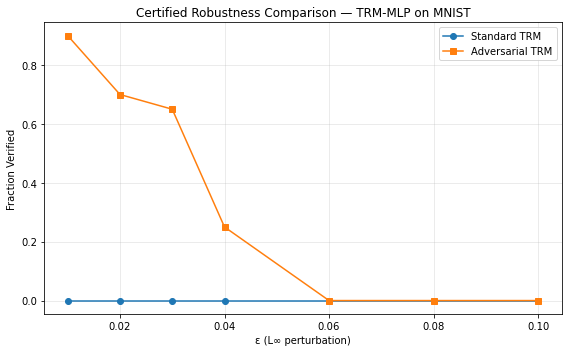

In [3]:
# Plot 1 — Fraction Verified vs Epsilon
plt.figure(figsize=(8,5))
plt.plot(std_df["epsilon"], std_df["verified_fraction"], 'o-', label="Standard TRM")
plt.plot(adv_df["epsilon"], adv_df["verified_fraction"], 's-', label="Adversarial TRM")
plt.xlabel("ε (L∞ perturbation)")
plt.ylabel("Fraction Verified")
plt.title("Certified Robustness Comparison — TRM-MLP on MNIST")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

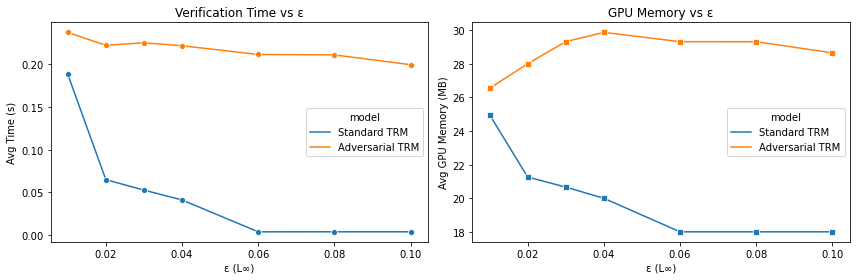

In [4]:
# Plot 2 — Verification Time and Memory
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(data=df, x="epsilon", y="avg_time_s", hue="model", marker="o", ax=ax[0])
ax[0].set_title("Verification Time vs ε")
ax[0].set_xlabel("ε (L∞)")
ax[0].set_ylabel("Avg Time (s)")

sns.lineplot(data=df, x="epsilon", y="avg_mem_MB", hue="model", marker="s", ax=ax[1])
ax[1].set_title("GPU Memory vs ε")
ax[1].set_xlabel("ε (L∞)")
ax[1].set_ylabel("Avg GPU Memory (MB)")

plt.tight_layout()
plt.show()

In [5]:
# Summary Report
summary = df.groupby("model")[["verified", "falsified"]].sum()
print(summary)

                 verified  falsified
model                               
Adversarial TRM        50         90
Standard TRM            0        140
